In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import fetch_openml

In [6]:
from sklearn.datasets import load_linnerud
from sklearn.datasets import fetch_openml

hf = fetch_openml(data_id=41187, as_frame=True)

In [7]:


print(hf.keys()) #shows the available outputs. 



dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [8]:


hf.target



0       316.1
1       317.3
2       317.6
3       317.5
4       316.4
        ...  
2220    370.3
2221    370.8
2222    371.2
2223    371.3
2224    371.5
Name: co2, Length: 2225, dtype: float64

In [9]:


hf.data



,year,month,day,weight,flag,station
0,1958.0,3.0,29.0,4.0,0.0,MLO
1,1958.0,4.0,5.0,6.0,0.0,MLO
2,1958.0,4.0,12.0,4.0,0.0,MLO
3,1958.0,4.0,19.0,6.0,0.0,MLO
4,1958.0,4.0,26.0,2.0,0.0,MLO
...,...,...,...,...,...,...
2220,2001.0,12.0,1.0,7.0,0.0,MLO
2221,2001.0,12.0,8.0,7.0,0.0,MLO
2222,2001.0,12.0,15.0,7.0,0.0,MLO
2223,2001.0,12.0,22.0,6.0,0.0,MLO


In [10]:
#make a dataframe from the given data
hdf = pd.DataFrame(hf.data, columns=hf.feature_names)
hdf.head()
hf.feature_names

['year', 'month', 'day', 'weight', 'flag', 'station']

In [11]:
#add target value to the dataset
hdf['year'] = hf.target

In [12]:


hdf.head()



,year,month,day,weight,flag,station
0,316.1,3.0,29.0,4.0,0.0,MLO
1,317.3,4.0,5.0,6.0,0.0,MLO
2,317.6,4.0,12.0,4.0,0.0,MLO
3,317.5,4.0,19.0,6.0,0.0,MLO
4,316.4,4.0,26.0,2.0,0.0,MLO


In [13]:


#right after loading the data we first check for missing values as it causes issues 

hdf.isnull().sum()



year       0
month      0
day        0
weight     0
flag       0
station    0
dtype: int64

In [14]:


hdf = hdf.dropna(1)
print(hdf.dtypes)
#housing_df = housing_df.drop('MSZoning', axis=1)



year        float64
month       float64
day         float64
weight      float64
flag        float64
station    category
dtype: object


C:\Users\buitems\AppData\Local\Temp\ipykernel_8932\3381994909.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  hdf = hdf.dropna(1)


C:\Users\buitems\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


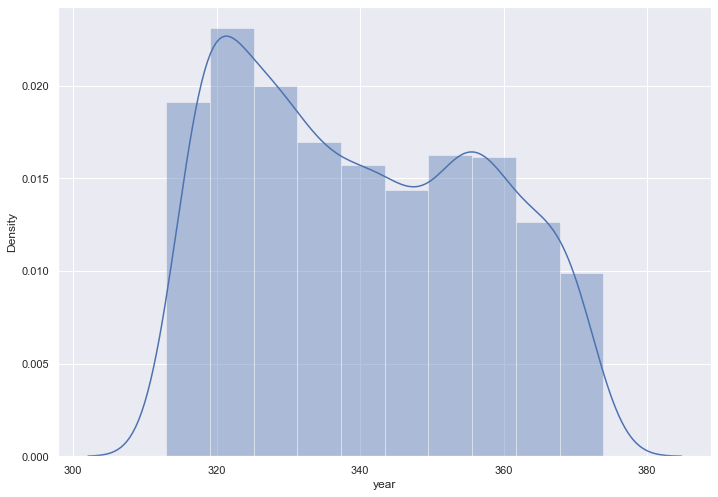

In [15]:


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(hdf['year'], bins=10)
plt.show()



<AxesSubplot:>

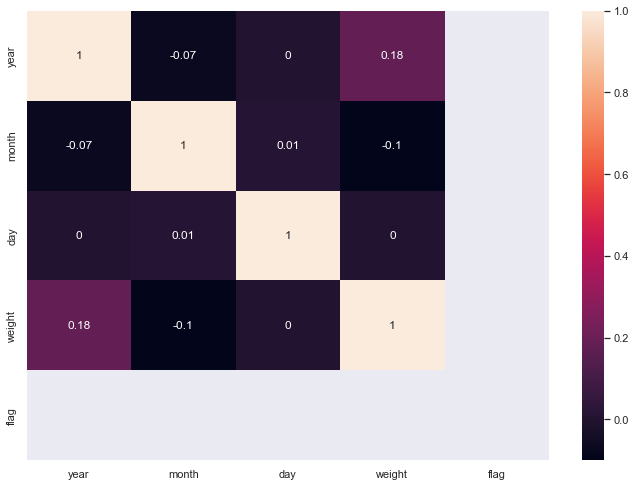

In [99]:


correlation_matrix = hdf.corr().round(2)
# print(correlation_matrix)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)



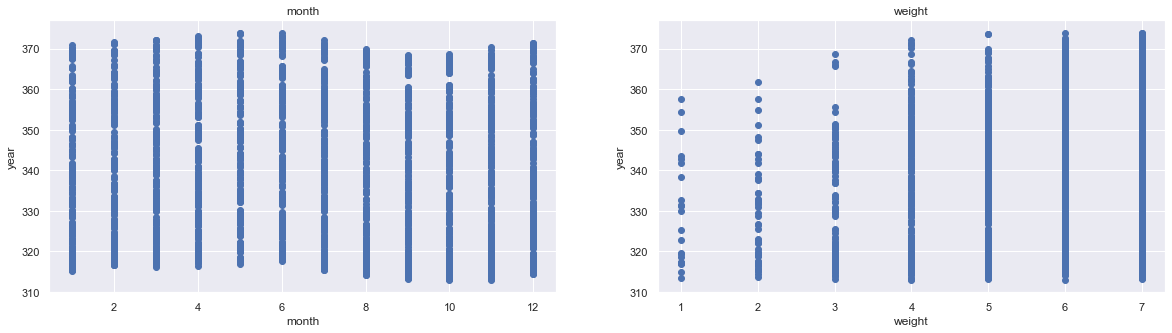

In [16]:
# OverallQual,YearRemodAdd

#lets plot these

plt.figure(figsize=(20, 5))

features = ['month','weight']
target = hdf['year']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = hdf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('year')

In [17]:
#housing_df.isna().values.any()
#housing_df.isnull().values.any()
#housing_df = housing_df.dropna()
print(hdf.isnull().values.any())

False


In [18]:


#dividing into  X and Y

X = pd.DataFrame(np.c_[hdf['month'], hdf['weight']], columns = ['month','weight'])
y = hdf['year']

print(X.dtypes)
print(y.dtypes)



month     float64
weight    float64
dtype: object
float64


In [19]:
#dividing into test and train 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1780, 2)
(445, 2)
(1780,)
(445,)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [21]:
from sklearn.metrics import r2_score
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
testPred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 16.676000855550754
R2 score is 0.03828751287697485


The model performance for testing set
--------------------------------------
RMSE is 284.0886672570146
R2 score is 0.011694189926980791


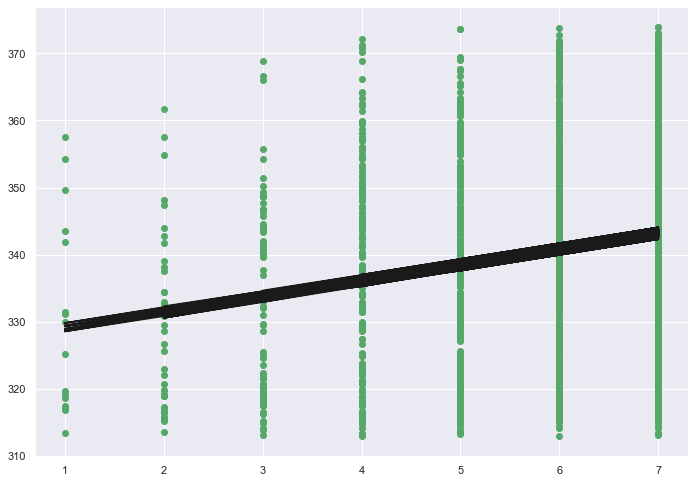

In [23]:


#plot to see
plt.scatter(X_train['weight'], Y_train,color='g') 
#plt.scatter(X_train['YearRemodAdd'], Y_train,color='b') 
plt.plot(X_train['weight'], y_train_predict,color='k') 



plt.show()



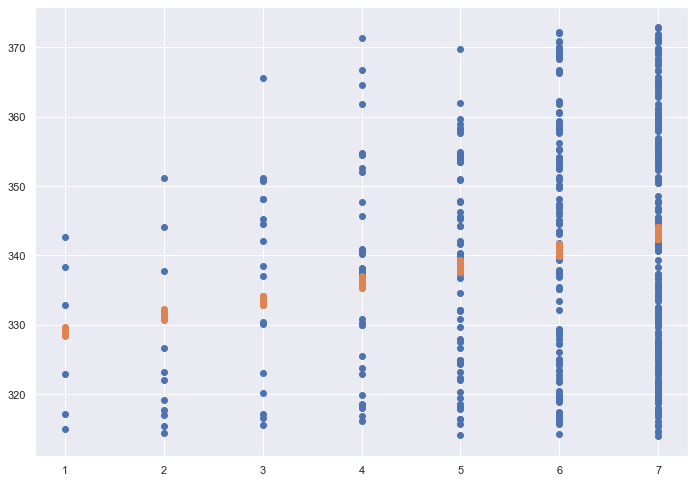

In [24]:
plt.scatter(X_test['weight'],Y_test)
plt.scatter(X_test['weight'],y_test_predict)
plt.show()